## Financial Payment Services Fraud Detection Analysis

### Data Science & Machine Learning

#### Arunava Kumar Chakraborty

This notebook represents a Machine Learning-based predictive approach to explore the given **Fraud** dataset. The Dataset has been uploaded in my [Kaggle repository](www.kaggle.com/arunavakrchakraborty/financial-payment-services-fraud-data).

I have Proposed an experimental approach to develop a Fraud detection model to predict future Fraud customers based on the related features. The best feature variables will be selected on the basis of their linear relationships. Furthermore, the **Logistic Regression** classifier will be developed to build the predictive system.

The classifier will be trained using the training data to predict the fraud cases from the validation data to identify the fraudulent customer.

## 1. Importing Packages
Here, required Python packages have been imported for the analysis.

- The **pandas**, **numpy** packages are required for basic analysis.
- The **matplotlib**, **seaborn** packages are used for visualization purpose.
- The **statsmodels** package is required to perform the statistical analysis of the data.
- The **sklearn** package is used for importing machine learning models for classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Load Datasets

In this section, the given **Fraud.csv** dataset has been loaded using the pandas dataframe.

In [2]:
fraud_df = pd.read_csv("../input/financial-payment-services-fraud-data/Fraud.csv")
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## 3. Data Pre-processing
In order to prepare the data for the predictive analysis, the dataset needs to be pre-processed at the initial phase of the experiment. The entire pre-processing of the data mainly consists of the following phases -
- **Missing Values Removal -** In this phase we will search for the missing values from the dataset.
- **Outliers Removal -** In this section all the outliers from the numerical columns will be identified and removed from the dataset.
- **Multi-collinearity Removal -** In this phase all the Multi-collinearity will be identified and removed for the datasets after calculating the difference values of the respective features.

### 3.1. Missing Values Removal

In [4]:
fraud_df.isnull().mean()*100

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

During the analysis, no missing values have been found from the dataset.

### 3.2. Outliers Removal

#### 3.2.1. Outliers fromf Amount of the Transaction

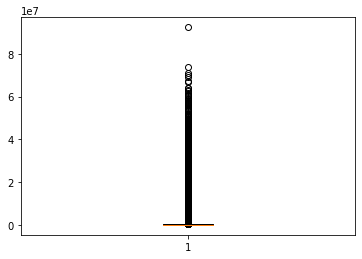

In [5]:
plt.boxplot(fraud_df['amount'])
plt.show()

In [6]:
fraud_df.query('amount>80000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,0.0,C439737079,9595.98,92455112.62,0,0


In [7]:
indexNames = fraud_df[fraud_df['amount'] > 80000000].index
fraud_df.drop(indexNames , inplace=True)

During the analysis, one outlier has been found for the **amount** feature with a value of greater than 80000000. The outlier has been removed from the dataset.

#### 3.2.2. Outliers from Initial Balance Before the Transaction

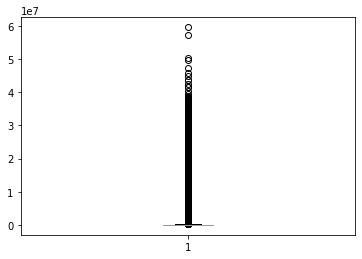

In [8]:
plt.boxplot(fraud_df['oldbalanceOrg'])
plt.show()

In [9]:
fraud_df.query('oldbalanceOrg>50000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5996399,425,TRANSFER,10000000.0,C40489106,59585040.37,49585040.37,C650095152,0.0,0.0,1,0
6281474,646,TRANSFER,10000000.0,C590657619,50399045.08,40399045.08,C1971187430,0.0,0.0,1,0
6362452,730,TRANSFER,10000000.0,C726730575,57316255.05,47316255.05,C1364745638,0.0,0.0,1,0


In [10]:
indexNames = fraud_df[fraud_df['oldbalanceOrg'] > 50000000].index
fraud_df.drop(indexNames , inplace=True)

During the analysis, three outliers have been found for the **oldbalanceOrg** feature with a value of greater than 50000000. The outliers have been removed from the dataset.

#### 3.2.3. Outliers from New Balance After the Transaction

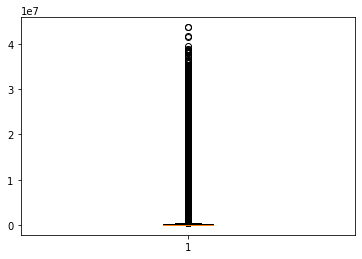

In [11]:
plt.boxplot(fraud_df['newbalanceOrig'])
plt.show()

In [12]:
fraud_df.query('newbalanceOrig>40000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4180200,304,PAYMENT,8301.85,C1568160039,41699144.49,41690842.64,M1906748245,0.00,0.00,0,0
4180201,304,CASH_OUT,258483.17,C438977024,41690842.64,41432359.46,C1162702437,6449276.06,6707759.23,0,0
4203639,305,CASH_OUT,132238.97,C559275248,43818855.30,43686616.33,C1114436169,5327024.57,5459263.54,0,0
4203640,305,PAYMENT,12814.12,C2080486364,43686616.33,43673802.21,M928977012,0.00,0.00,0,0


In [13]:
indexNames = fraud_df[fraud_df['newbalanceOrig'] > 40000000].index
fraud_df.drop(indexNames , inplace=True)

During the analysis, four outliers have been found for the **newbalanceOrig** feature with a value of greater than 40000000. The outliers have been removed from the dataset.

#### 3.2.4. Outliers from Initial Balance Recipient Before the Transaction

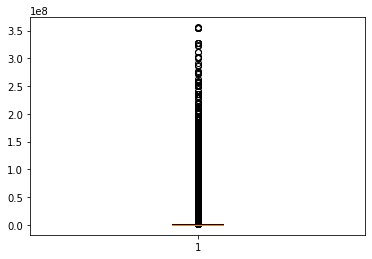

In [14]:
plt.boxplot(fraud_df['oldbalanceDest'])
plt.show()

In [15]:
fraud_df.query('oldbalanceDest>350000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4596803,328,CASH_IN,171982.69,C758787020,31748.00,203730.69,C439737079,3.555534e+08,3.553814e+08,0,0
4721497,332,CASH_IN,195896.55,C494525103,4178494.78,4374391.33,C439737079,3.553814e+08,3.551855e+08,0,0
5380607,376,CASH_OUT,194946.47,C4896808,0.00,0.00,C439737079,3.551855e+08,3.553805e+08,0,0
5486389,380,TRANSFER,635405.82,C1666289749,0.00,0.00,C439737079,3.553805e+08,3.560159e+08,0,0
5920180,404,CASH_OUT,163389.56,C1323053481,0.00,0.00,C439737079,3.560159e+08,3.561793e+08,0,0


In [16]:
indexNames = fraud_df[fraud_df['oldbalanceDest'] > 350000000].index
fraud_df.drop(indexNames , inplace=True)

During the analysis, Five outliers have been found for the **oldbalanceDest** feature with a value of greater than 350000000. The outliers have been removed from the dataset.

#### 3.2.5. Outliers from New Balance Recipient After the Transaction

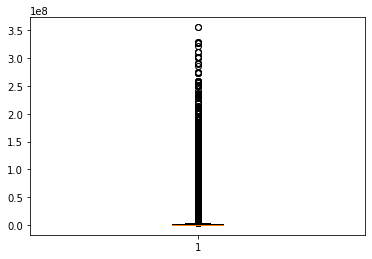

In [17]:
plt.boxplot(fraud_df['newbalanceDest'])
plt.show()

In [18]:
fraud_df.query('newbalanceDest>350000000')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4124250,302,TRANSFER,3325263.90,C1812458696,0.0,0.0,C439737079,3.215898e+08,355553416.3,0,0
4133583,302,TRANSFER,30638354.89,C1800693711,0.0,0.0,C439737079,3.249151e+08,355553416.3,0,0


In [19]:
indexNames = fraud_df[fraud_df['newbalanceDest'] > 350000000].index
fraud_df.drop(indexNames , inplace=True)

During the analysis, two outliers have been found for the **newbalanceDest** feature with a value of greater than 350000000. The outliers have been removed from the dataset.

In [20]:
fraud_df['isFraud'].unique()

array([0, 1])

In [21]:
fraud_df['isFlaggedFraud'].unique()

array([0, 1])

In [22]:
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### 3.3. Multi-collinearity Removal

In [23]:
num_fraud_df = fraud_df[['step', 'amount', 'oldbalanceOrg',
                         'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
                         'isFraud', 'isFlaggedFraud']]
num_fraud_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


#### 3.3.1. Identify Multi-collinearity

In [24]:
X = num_fraud_df[list(num_fraud_df)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
3,547.616120,newbalanceOrig
2,545.307261,oldbalanceOrg
5,83.919587,newbalanceDest
4,72.236866,oldbalanceDest
1,4.078319,amount
0,1.191735,step
6,1.188005,isFraud
7,1.002548,isFlaggedFraud


During the analysis, two high multi-collinearity have been found i.e. -
- `newbalanceOrig` vs. `oldbalanceOrg`
- `newbalanceDest` vs. `oldbalanceDest`

#### 3.3.1. Remove Multi-collinearity
- The difference between `newbalanceOrig` and `oldbalanceOrg` has been calculated as `balanceOrigDiff`. Finally, the `newbalanceOrig` and `oldbalanceOrg` attributes have been removed from the dataset.

- Since the account balance of the Merchants are not available for the destination accounts so both `newbalanceDest` and `oldbalanceDest` attributes are required for further analysis.

In [25]:
num_fraud_df['balanceOrigDiff'] = num_fraud_df['oldbalanceOrg'] - num_fraud_df['newbalanceOrig']
final_df = num_fraud_df.drop(['newbalanceOrig', 'oldbalanceOrg'], axis=1)
final_df.head()

,step,amount,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff
0,1,9839.64,0.0,0.0,0,0,9839.64
1,1,1864.28,0.0,0.0,0,0,1864.28
2,1,181.00,0.0,0.0,1,0,181.00
3,1,181.00,21182.0,0.0,1,0,181.00
4,1,11668.14,0.0,0.0,0,0,11668.14


## 4. Exploratory Data Analysis

In this section, the average amount of each category of amount payment has been calculated to understand the payment flow.

In [26]:
amount_fraud_df = fraud_df.groupby(['type'])[['amount']].mean()
amount_fraud_df = amount_fraud_df.reset_index()
amount_fraud_df.head()

,type,amount
0,CASH_IN,168920.220537
1,CASH_OUT,176273.944698
2,DEBIT,5483.665314
3,PAYMENT,13057.606984
4,TRANSFER,910364.274711


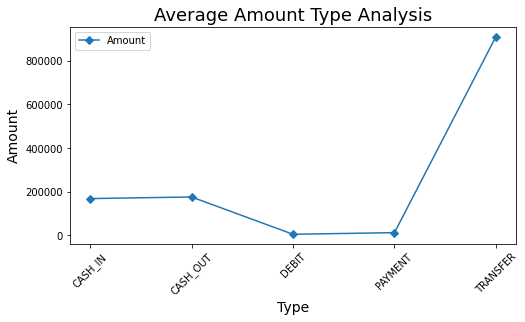

In [27]:
x = amount_fraud_df.loc[:, 'type']
y1 = amount_fraud_df['amount']

plt.figure(figsize = (8, 4))

plt.plot(x, y1, marker='D', label = 'Amount')

plt.xlabel('Type', fontsize = 14)
plt.ylabel('Amount', fontsize = 14)
plt.title('Average Amount Type Analysis', fontsize = 18)
plt.legend(fontsize = 10, loc = 'best')
plt.xticks(rotation=45)
plt.show()

During the analysis, it has been found that the maximum amount has been transferred from one account to another one.

## 5. Predictive Analysis [Regression Models]

### 5.1. Correlation of Features
In this phase of analysis, the correlations have been evaluated to measure the dependencies between the feature variables and the fraud data. The correlations represent the relationships between the variables in terms of statistical analysis. The linear relationships between the two variables have been defined by the covariance matrix.

In [28]:
final_df_corr = final_df.corr()
final_df_corr

,step,amount,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff
step,1.000000,0.022392,0.027742,0.025945,0.031551,0.003277,0.007182
amount,0.022392,1.000000,0.295605,0.461208,0.076651,0.012321,0.102135
oldbalanceDest,0.027742,0.295605,1.000000,0.976387,-0.005912,-0.000516,-0.047750
newbalanceDest,0.025945,0.461208,0.976387,1.000000,0.000547,-0.000531,-0.006460
isFraud,0.031551,0.076651,-0.005912,0.000547,1.000000,0.044117,0.362041
isFlaggedFraud,0.003277,0.012321,-0.000516,-0.000531,0.044117,1.000000,0.000230
balanceOrigDiff,0.007182,0.102135,-0.047750,-0.006460,0.362041,0.000230,1.000000


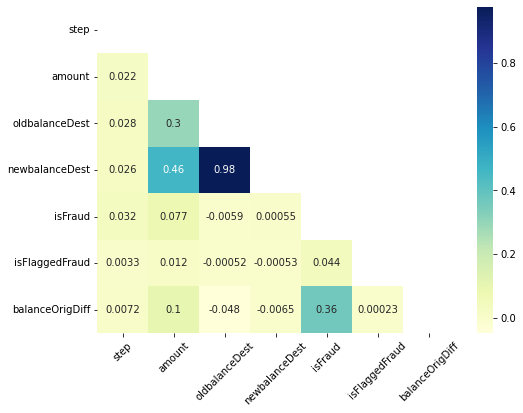

In [29]:
mask = np.triu(np.ones_like(final_df_corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(final_df_corr,annot=True, mask = mask, cmap=plt.cm.YlGnBu)
plt.xticks(rotation=45)
plt.show()

### 5.2. Feature Selection
In this phase, those feature(s) will be selected which have the better correlation (threshold > 0.25) with the target variable `isFraud`. These features will help to develop a better classification model for predictive analysis.

In [30]:
cor_target = abs(final_df_corr["isFraud"])

relevant_train_features = cor_target[cor_target>0.25]
relevant_train_features

isFraud            1.000000
balanceOrigDiff    0.362041
Name: isFraud, dtype: float64

During the analysis, `balanceOrigDiff` attribute has the highest correlation with the target variable `isFraud`. So, this variable has been selected as the relevant training feature to predict fraud transactions.

In [31]:
final_fraud_data = final_df[['balanceOrigDiff', 'isFraud']]
final_fraud_data.head()

,balanceOrigDiff,isFraud
0,9839.64,0
1,1864.28,0
2,181.00,1
3,181.00,1
4,11668.14,0


### 5.2. Train-Test-Val Split

The fraud data will be divided into **X** and **y** sets based on the feature variables and the target variable. The **X** set contains the independent variable`balanceOrigDiff` and the **y** set contains the dependent variable `isFraud`. The X and y sets have been divided into **80:20** ratio i.e. **80%** of data can be used for **training** purpose and **20%** of data can be used for **validation** purpose.

In [32]:
X = final_fraud_data.drop(['isFraud'], axis=1)
y = final_fraud_data['isFraud']

In [33]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(5090084, 1) (1272521, 1) (5090084,) (1272521,)


### 5.3 Logistic Regression Model
- In order to build the predictive model, the machine learning-based classifier has been trained based on the training data and validated using the validation data to analyze the model performance.
- The confusion matrix and classification report have been presented for the classification model to understand the model performance on the corresponding dataset.

#### 5.3.1 Model Training

In [34]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
log_reg_model.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0])

#### 5.3.2 Model Performance Analysis

In [36]:
log_reg_model_score = log_reg_model.score(X_val, y_val)
log_reg_model_accuracy = round(log_reg_model_score*100, 2)
print("The classification accuracy of Logistic Regression model is "+ str(log_reg_model_accuracy)+"%")

The classification accuracy of Logistic Regression model is 99.91%


During predictive analysis, the **Logistic Regression** model has achieved significant prediction accuracy on the validation data. It has been found that the **Logistic Regression** model achieved **99.91%** prediction accuracy for classifying the fraud and potential customers based on the selected features.

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

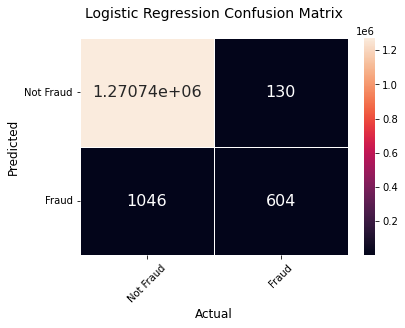

In [37]:
y_pred = log_reg_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
axes = sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', linewidths=.5)
class_labels = ['Not Fraud', 'Fraud']

axes.set_xlabel('Actual', fontsize=12)
axes.set_ylabel('Predicted', fontsize=12)

xtick_marks = np.arange(len(class_labels)) + 0.5
ytick_marks = np.arange(len(class_labels)) + 0.5

axes.set_xticks(xtick_marks)
axes.set_xticklabels(class_labels, rotation=45)

axes.set_yticks(ytick_marks)
axes.set_yticklabels(class_labels, rotation=0)

axes.set_title('Logistic Regression Confusion Matrix', fontsize=14, pad=20)

The validation data consists of total **1270871** cases of genuine and **1650** cases of fraud transaction records.

From the confusion matrix it has been found how many transactions have been classified correctly by the classifier as follows -
- **TP = True Positive** (Actual -> Not Fraud ; Predicted -> Not Fraud) = 1270741 cases
- **FP = False Positive** (Actual -> Fraud ; Predicted -> Not Fraud) = 130 cases
- **FN = False Negative** (Actual -> Not Fraud ; Predicted -> Fraud) = 1046 cases
- **TN = True Negative** (Actual -> Fraud ; Predicted -> Fraud) = 604 cases

In [38]:
print('Logistic Regression Classification Report')
print('=========================================')
print()
print(classification_report(y_val, y_pred, target_names=class_labels))

Logistic Regression Classification Report

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1270871
       Fraud       0.82      0.37      0.51      1650

    accuracy                           1.00   1272521
   macro avg       0.91      0.68      0.75   1272521
weighted avg       1.00      1.00      1.00   1272521



The model performance has been analyzed using the following metrics -
$$\mathrm{precision =\ }\frac{\mathrm{TP}}{\mathrm{TP + FP}}\mathrm{\ =\ }\frac{\mathrm{1270741}}{\mathrm{1270741 + 130}}\mathrm{\ = 0.99989\ (approx.)\ }$$

$$\mathrm{recall =\ }\frac{\mathrm{TP}}{\mathrm{TP + FN}}\mathrm{\ =\ }\frac{\mathrm{1270741}}{\mathrm{1270741 + 1046}}\mathrm{\ = 0.99918\ (approx.)\ }$$

$$\mathrm{f1-score =\ }\frac{\mathrm{2 * precision * recall}}{\mathrm{precision + recall}}\mathrm{\ =\ }\frac{\mathrm{2 * 0.99989 * 0.99918}}{\mathrm{0.99989 + 0.99918}}\mathrm{\ = 0.99954\ (approx.)\ }$$

$$\mathrm{accuracy =\ }\frac{\mathrm{TP + TN}}{\mathrm{TP + FP + FN + TN}}\mathrm{\ =\ }\frac{\mathrm{1270741 + 604}}{\mathrm{1270741 + 130+ 1046 + 604}}\mathrm{\ = 0.99908\ (approx.)\ }$$

#### Key factors to predict fraudulent customers -
- Need to check that the amount is debited from the customer's account, whether the same amount is credited to the destonation account or not. If the same amount is credited to the destonation account then the transaction is genuine.
- The balance details for destination accounts are not sufficient since the Marchent accounts have no records. So it is difficult to predict the fraud transactions having marchent's account as the destonation account.

#### Further Preventions
- Detailed customer information needs to be collected at the initial stage. These details may include Name, DOB, Address, Contact, and Unique Gov. IDs (for verification).
- The online secure transaction API can be used for payment gateway.
- Maintain the data of the fraud customers.
- Update the legal policy against fraud customers.

#### Future Implementation 
- Detailed customer records help to identify authentic customers which will help to prevent fraud transactions.
- The online secure transaction API help to prevent any unauthorized activities during the online payment.
- The new customer's data needs to be matched with the previous fraud customers to prevent fraud transactions.

Furthermore, a secure web application can be developed based on this predictive system for analyzing customer data to predict whether the customer is fraudulent or not. The web-based system will display the predicted outcome through its user interface. After the deployment of the web-based system in the server, the user of the predictive system need not to be concerned about the backend analysis. It will further help to implement an abstraction between the user and developer levels.